In [19]:
# customer purchase predicition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [22]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("logistic accuracy: ", accuracy_score(y_test,lr_pred))

logistic accuracy:  0.8625


In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("knn accuracy:" , accuracy_score(y_test,knn_pred))

knn accuracy: 0.9125


In [28]:
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print("svm accuracy:", accuracy_score(y_test,svm_pred))

svm accuracy: 0.8625


In [29]:
params = {'n_neighbors':[3,5,7,9]}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'n_neighbors': 9}


In [30]:

new_customer = [[30, 50000]]

new_customer = scaler.transform(new_customer)

prediction = knn.predict(new_customer)

print("Prediction:", prediction)

Prediction: [0]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:

new_customer = [[45, 120000]]

new_customer = scaler.transform(new_customer)

prediction = knn.predict(new_customer)

print("Prediction:", prediction)

Prediction: [1]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


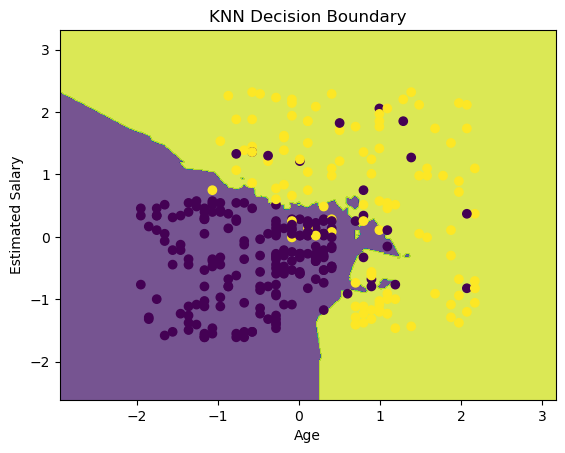

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
    np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01)
)

Z = knn.predict(
    np.array([X1.ravel(), X2.ravel()]).T
)

plt.contourf(X1, X2, Z.reshape(X1.shape), alpha=0.75)
plt.scatter(X_set[:,0], X_set[:,1], c=y_set)

plt.title("KNN Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
def plot_boundary(model, title):

    X_set, y_set = X_train, y_train

    X1, X2 = np.meshgrid(
        np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
        np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01)
    )

    Z = model.predict(
        np.array([X1.ravel(), X2.ravel()]).T
    )

    plt.contourf(X1, X2, Z.reshape(X1.shape), alpha=0.75)
    plt.scatter(X_set[:,0], X_set[:,1], c=y_set)

    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.show()

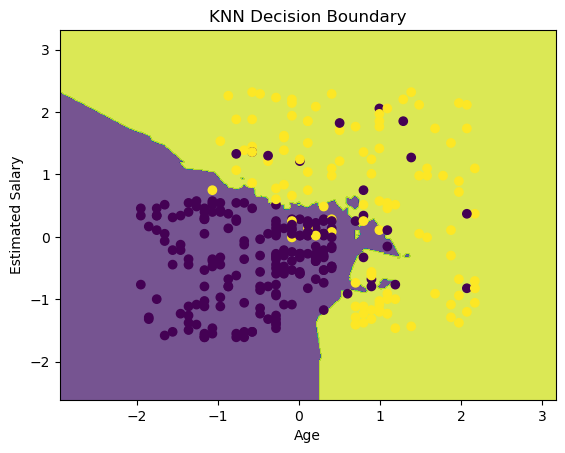

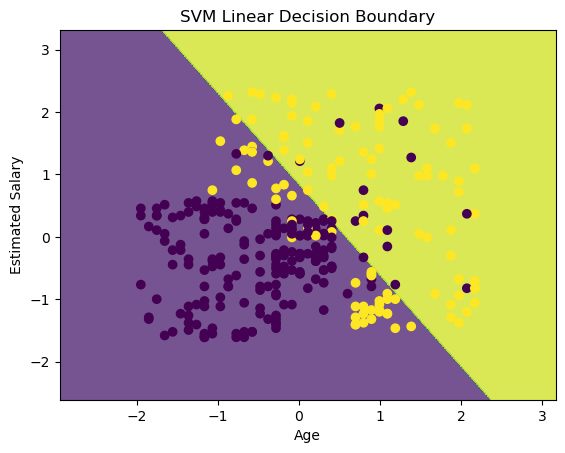

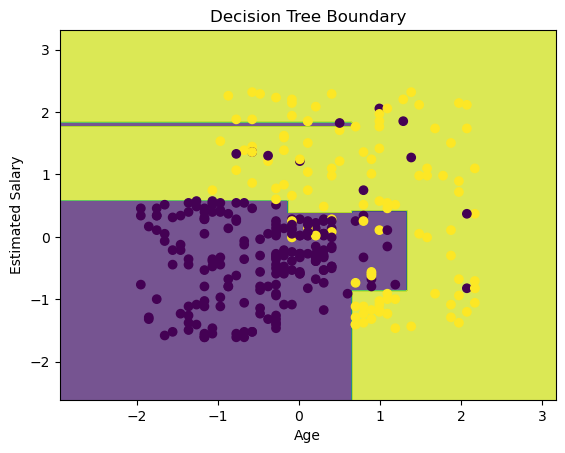

In [36]:
plot_boundary(knn, "KNN Decision Boundary")
plot_boundary(svm, "SVM Linear Decision Boundary")
plot_boundary(tree, "Decision Tree Boundary")